In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize
from model import log
import mosquitoes_train
%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "/home/tda1/jm1/Mask_RCNN_Humanpose/logs/mosquitoes20180822T1707/mask_rcnn_mosquitoes_0009.h5")
# Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
COCO_DIR = "./data"  # TODO: enter value here
IMAGE_DIR = os.path.join(ROOT_DIR, "data/images")

/home/tda1/anaconda3/envs/tensorflow_tf_19_keras216/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tda1/anaconda3/envs/tensorflow_tf_19_keras216/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tda1/anaconda3/envs/tensorflow_tf_19_keras216/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.



Configurations Superlee:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
KEYPOINT_MASK_POOL_SIZE        7
KEYPOINT_MASK_SHAPE            [56, 56]
KEYPOINT_THRESHOLD             0.005
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               128
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                [256, 256]
NAME                           mosquitoes
NUM

In [4]:
class InferenceConfig(mosquitoes_train.MosquitoesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    KEYPOINT_MASK_POOL_SIZE = 7
    LIMBS = [0,1,2]

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
print(ROOT_DIR)
model_path = os.path.join(ROOT_DIR, "/home/tda1/jm1/Mask_RCNN_Humanpose/logs/mosquitoes20180822T1707/mask_rcnn_mosquitoes_0009.h5") #Change here
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

# Load image from datasets
dataset_dir = './data'

print('loading training dataset!')
train_dataset_keypoints = mosquitoes_train.MosquitoesDataset()
train_dataset_keypoints.load_dataset(dataset_dir, "train")
train_dataset_keypoints.prepare()
print('loading training dataset done!')

print('loading val dataset!')
val_dataset_keypoints = mosquitoes_train.MosquitoesDataset()
val_dataset_keypoints.load_dataset(dataset_dir, "val")
val_dataset_keypoints.prepare()
print('loading val dataset done!')

['input_image', 'zero_padding2d_1', 'conv1', 'bn_conv1', 'activation_1', 'max_pooling2d_1', 'res2a_branch2a', 'bn2a_branch2a', 'activation_2', 'res2a_branch2b', 'bn2a_branch2b', 'activation_3', 'res2a_branch2c', 'res2a_branch1', 'bn2a_branch2c', 'bn2a_branch1', 'add_1', 'res2a_out', 'res2b_branch2a', 'bn2b_branch2a', 'activation_4', 'res2b_branch2b', 'bn2b_branch2b', 'activation_5', 'res2b_branch2c', 'bn2b_branch2c', 'add_2', 'res2b_out', 'res2c_branch2a', 'bn2c_branch2a', 'activation_6', 'res2c_branch2b', 'bn2c_branch2b', 'activation_7', 'res2c_branch2c', 'bn2c_branch2c', 'add_3', 'res2c_out', 'res3a_branch2a', 'bn3a_branch2a', 'activation_8', 'res3a_branch2b', 'bn3a_branch2b', 'activation_9', 'res3a_branch2c', 'res3a_branch1', 'bn3a_branch2c', 'bn3a_branch1', 'add_4', 'res3a_out', 'res3b_branch2a', 'bn3b_branch2a', 'activation_10', 'res3b_branch2b', 'bn3b_branch2b', 'activation_11', 'res3b_branch2c', 'bn3b_branch2c', 'add_5', 'res3b_out', 'res3c_branch2a', 'bn3c_branch2a', 'activatio

Processing 1 images
image                    shape: (1200, 1600, 3)       min:    3.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 11)               min:    0.00000  max: 1600.00000
windows                  shape: (1, 4)                min:    0.00000  max: 1024.00000
rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 261888, 4)        min:   -8.25700  max:  127.51559
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 3)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 3, 4)       min:   -3.59625  max:    4.25343
detections               shape: (1, 100, 6)           min:    0.00000  max: 1024.00000
mrcnn_mask               shape: (1, 100, 28, 28, 3)   min:    0.00000  max:    0.04542
mrcnn_keypoint_prob    

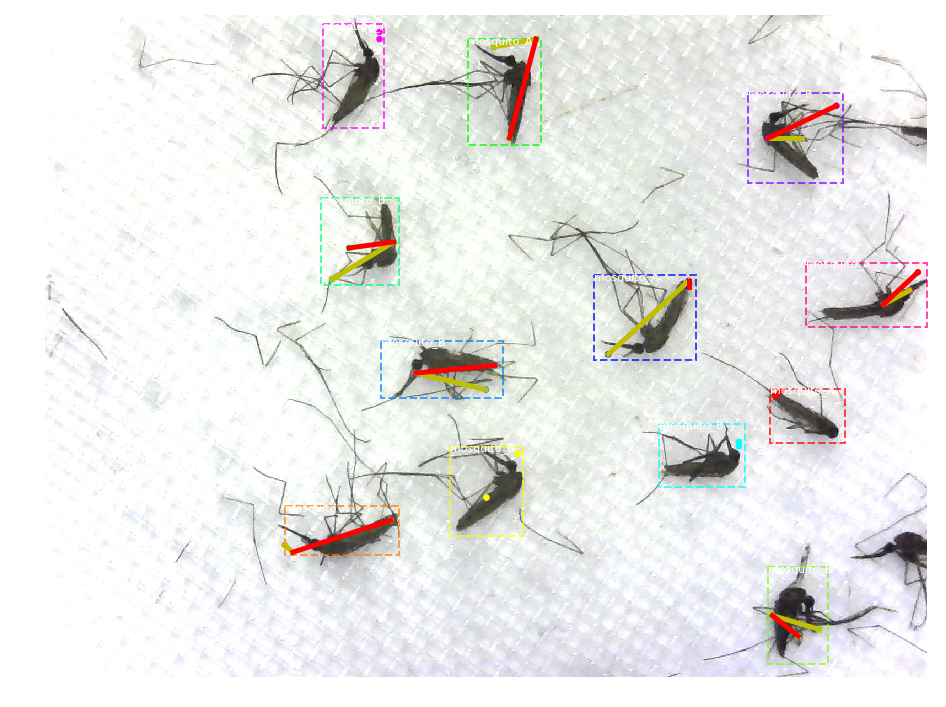

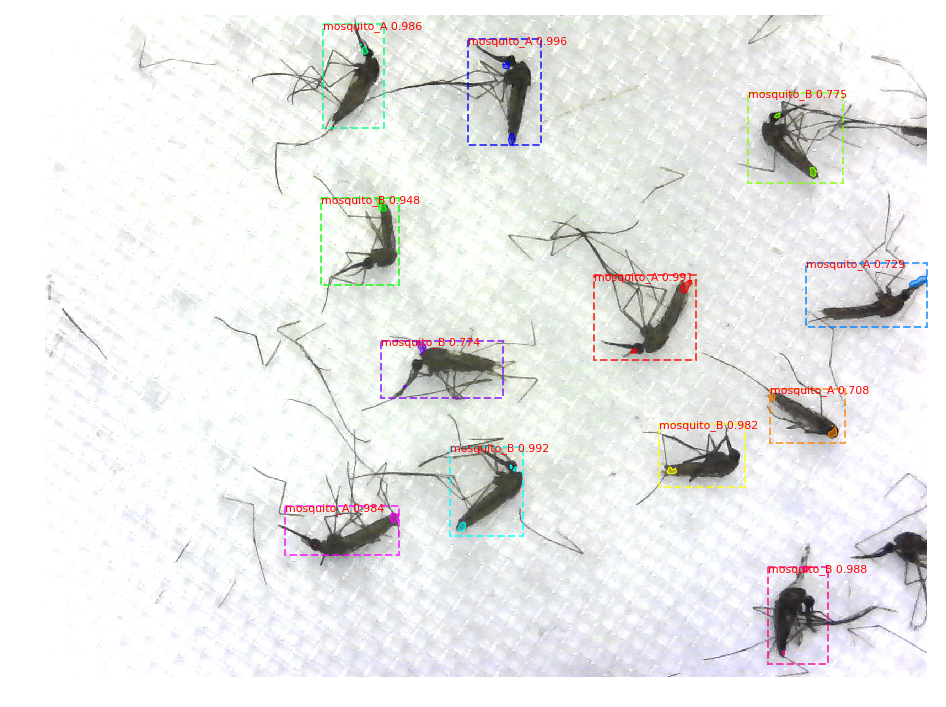

In [5]:
#import cv2
# COCO Class names
#For human pose task We just use "BG" and "person"
class_names = ['BG', 'mosquito_A', "mosquito_B"]

# display images from datasets
image = train_dataset_keypoints.load_image(15)
# image = val_dataset_keypoints.load_image(15)

# # Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# # image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
# print(IMAGE_DIR)

# image = plt.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
# #BGR->RGB
# image = image[:,:,::-1]

# Run detection
results = model.detect_keypoint([image], verbose=1)
r = results[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names, skeleton = inference_config.LIMBS)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [1]:
import cv2